In [1]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

In [2]:
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [3]:
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [4]:
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x0,w))))
    return cost/float(np.size(y))

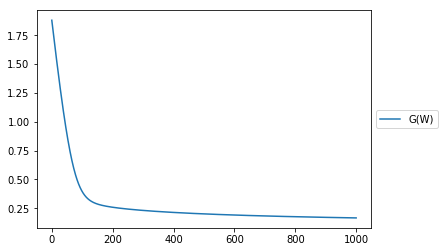

[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.]


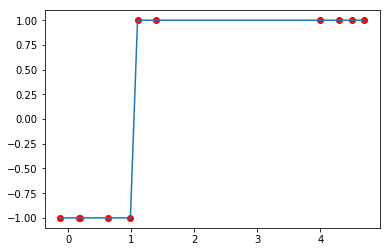

0


In [7]:
# load in dataset
csvname = datapath + '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
x0 = np.insert(x,0,1,axis=0)
#w = 0.1*np.random.randn(2,1);
w = ([3, 3])
g = softmax;
max_its = 1000; 
alpha_choice = 10**(-1);
weight_history, cost_history = gradient_descent(g,alpha_choice,max_its,w)
yfit = model(x0,weight_history[-1])
for i in range(0,len(yfit)):
    if(yfit[i]>=0):
        yfit[i] = '1'
    else:
        yfit[i] = '-1'
plot_cost_histories([cost_history], ["G(W)"])
plt.figure()
plt.plot(x.T,y.T,'ro')
print(yfit)
plt.plot(x.T,yfit)
plt.show();
for k in range(max_its):
    mis = identity_func(y,yfit)
print(mis)

In [5]:
def identity_func(y,yfit):
    no_of_miscalc = 0;
    
    for i in range(0,y.size):
        if(y.T[i] != yfit[i]):
            no_of_miscalc +=1
    
    
    return no_of_miscalc
        
    

In [6]:
def model(x0,w):
    a = np.dot(x0.T,w)
    return a.T